In [1]:
import sys
sys.path.append(r"C:\Users\trund\QRT")

from backtest.backtesting import FunctionStrategy, Backtester # To backtest the strategy
import backtest.backtest_results as btr
import eda_pipeline 
import eda_package.descriptive as eda

from typing import Optional, List, Tuple, Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import scipy.stats as stats
import yfinance as yf

In [2]:
tickers = [
    "BARC.L",  # Barclays (LSE)
    "HSBA.L",  # HSBC (LSE)
    "LLOY.L",  # Lloyds Banking Group (LSE)
    "NWG.L",   # NatWest Group (LSE)
    "STAN.L",  # Standard Chartered (LSE)
    "III.L",   # 3i Group (LSE)
    "LGEN.L",  # Legal & General (LSE)
    "PRU.L",   # Prudential (LSE)
]


dates = (pd.Timestamp("2022-01-01"), pd.Timestamp("2024-12-31"))
interval = "1d"

data = yf.download(tickers, start=dates[0], end=dates[1], interval=interval, auto_adjust=False)
#data.columns = [f"{ticker}_{col}" for col, ticker in data.columns]

data

[*********************100%***********************]  8 of 8 completed


Price        Adj Close                                                  \
Ticker          BARC.L      HSBA.L        III.L      LGEN.L     LLOY.L   
Date                                                                     
2022-01-04  196.358490  470.274933  1501.854736  304.132538  49.809807   
2022-01-05  197.616562  467.083282  1478.879761  301.341400  50.578259   
2022-01-06  200.142685  477.007416  1442.919067  299.048706  51.895603   
2022-01-07  204.935303  481.046814  1450.411011  306.823944  52.733917   
2022-01-10  207.581253  490.721619  1412.452637  304.431580  52.703979   
...                ...         ...          ...         ...        ...   
2024-12-20  260.182281  760.398499  3547.236816  223.710480  54.173843   
2024-12-23  261.531921  764.696228  3555.235107  223.910324  53.933956   
2024-12-24  263.481415  771.592651  3580.229736  225.209213  54.193832   
2024-12-27  264.831085  776.689941  3595.226318  226.608047  54.333763   
2024-12-30  264.681122  781.287537  3580.229736  226.907791  54.393734   

Price                                                 Close              ...  \
Ticker           NWG.L        PRU.L      STAN.L      BARC.L      HSBA.L  ...   
Date                                                                     ...   
2022-01-04  252.243622  1314.041626  462.222321  196.660004  471.500000  ...   
2022-01-05  254.928192  1293.556519  459.625671  197.919998  468.299988  ...   
2022-01-06  261.585938  1284.562988  476.704193  200.449997  478.250000  ...   
2022-01-07  264.700073  1319.037964  486.392151  205.250000  482.299988  ...   
2022-01-10  265.237000  1295.055176  491.885254  207.899994  492.000000  ...   
...                ...          ...         ...         ...         ...  ...   
2024-12-20  395.291138   628.271057  971.683533  260.250000  760.799988  ...   
2024-12-23  396.790344   632.870056  980.480652  261.600006  765.099976  ...   
2024-12-24  399.588837   633.070068  990.477356  263.549988  772.000000  ...   
2024-12-27  400.188538   636.869324  982.280029  264.899994  777.099976  ...   
2024-12-30  399.788757   633.070068  984.479370  264.750000  781.700012  ...   

Price              Open                Volume                               \
Ticker            PRU.L      STAN.L    BARC.L    HSBA.L    III.L    LGEN.L   
Date                                                                         
2022-01-04  1283.000000  453.600006  40400336  36059821  1287513  13942388   
2022-01-05  1306.500000  461.600006  28170350  27632008  1919416   6747955   
2022-01-06  1280.000000  455.399994  29020547  35001580  1210133  12440000   
2022-01-07  1278.000000  476.899994  40109355  31774685  2527588  14644031   
2022-01-10  1320.000000  491.100006  38889136  34726983  2259853  10812533   
...                 ...         ...       ...       ...      ...       ...   
2024-12-20   627.400024  977.400024  68228161  75955984  2481078  36999984   
2024-12-23   627.000000  973.799988  13605305  13697932   672865   7745286   
2024-12-24   635.000000  983.000000   8298189   3604795   294089   2846621   
2024-12-27   641.599976  986.000000  15970484  13069986   512647   6577197   
2024-12-30   634.599976  974.400024  14724719  11565121   546885   6994227   

Price                                                
Ticker         LLOY.L     NWG.L     PRU.L    STAN.L  
Date                                                 
2022-01-04  238638895  26358108   4706016   5488579  
2022-01-05  268522660  27454593   3729180   4738465  
2022-01-06  320456504  32904140   3870740   8383026  
2022-01-07  226744765  26115226   3954073   5642818  
2022-01-10  254924966  21233626   3957653   5112940  
...               ...       ...       ...       ...  
2024-12-20  349339807  81290524  13222232  17147511  
2024-12-23  193151547  12404584   2732519   5095476  
2024-12-24   70289585   2627707    975995   1909723  
2024-12-27   63634119  11922203   2018711   2446047  
2024-12-30   43336037   5998305   1924796   246

In [3]:
eda_pipeline.missing_and_duplicates(data)

Total rows: 754, Duplicated rows: 0

Top missing columns:
Empty DataFrame
Columns: [missing_count, missing_percentage]
Index: []


## Basic Univariate Plots for Adj_Close 

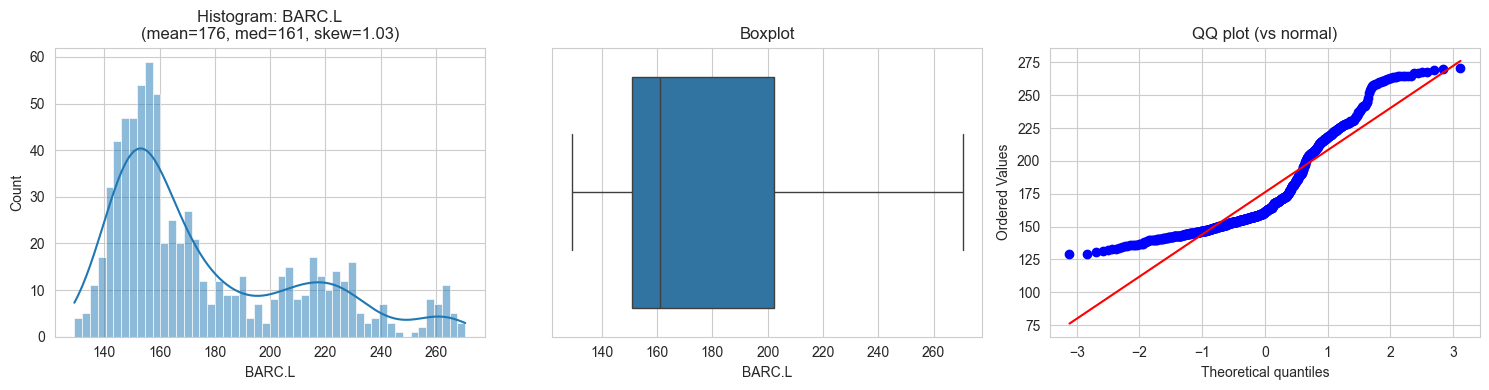

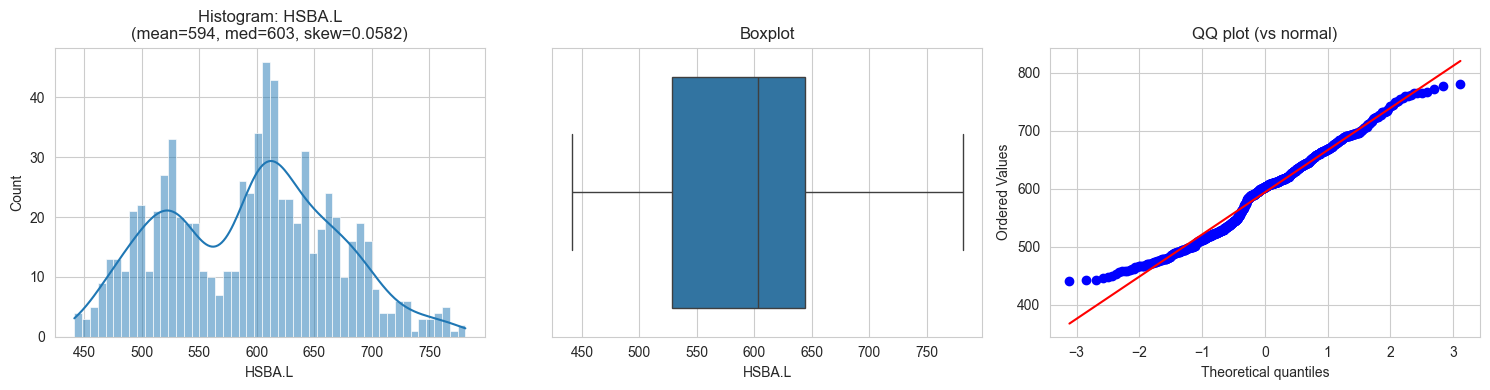

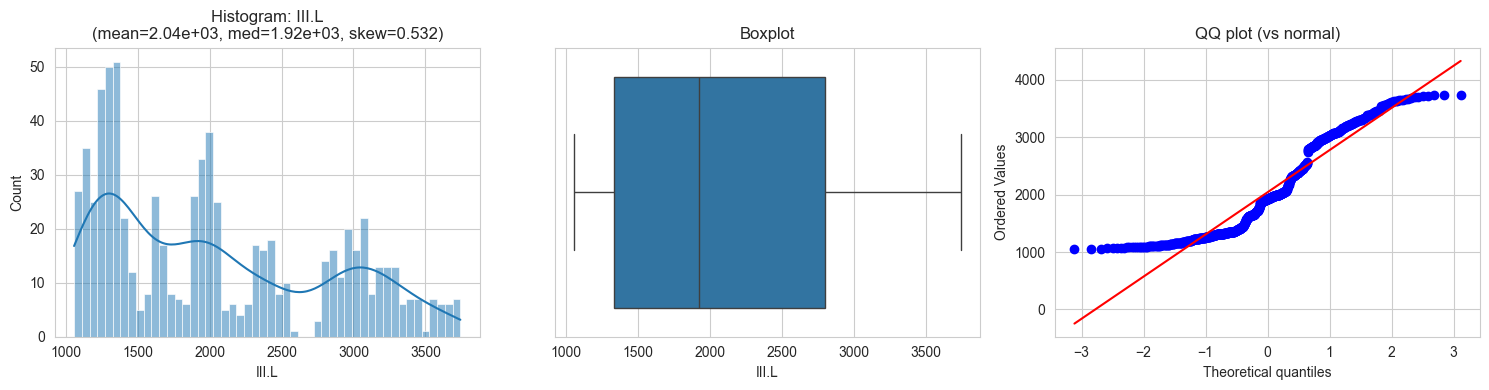

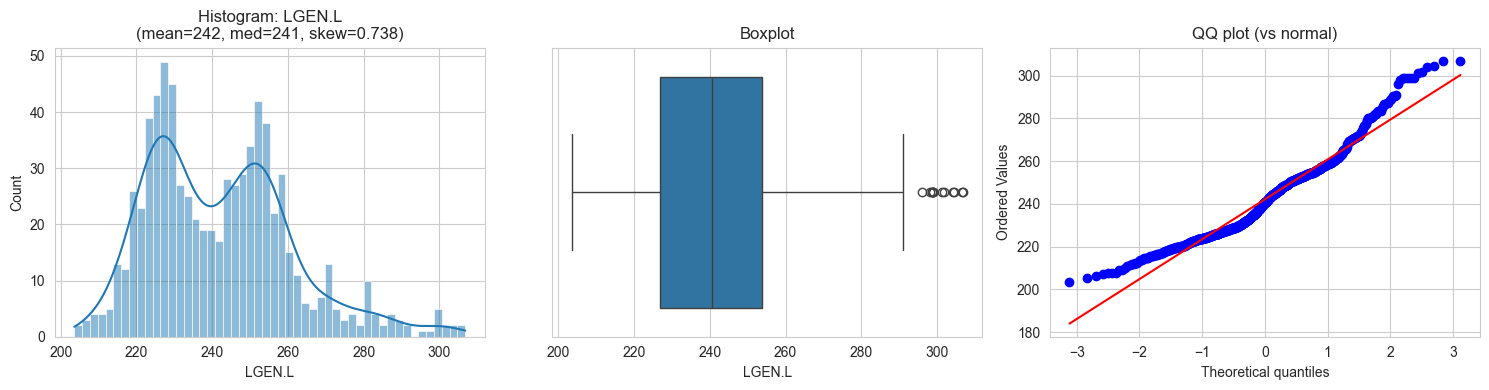

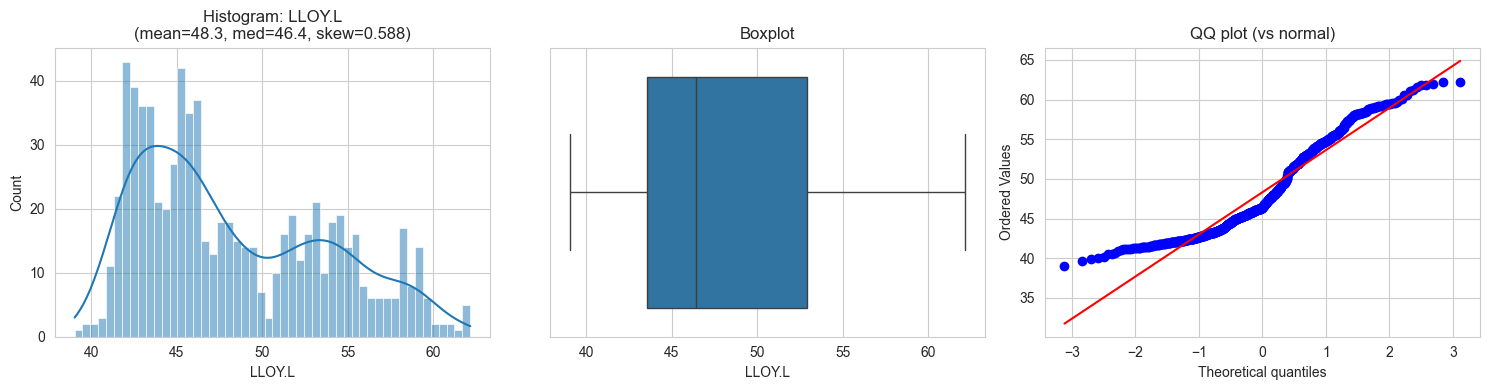

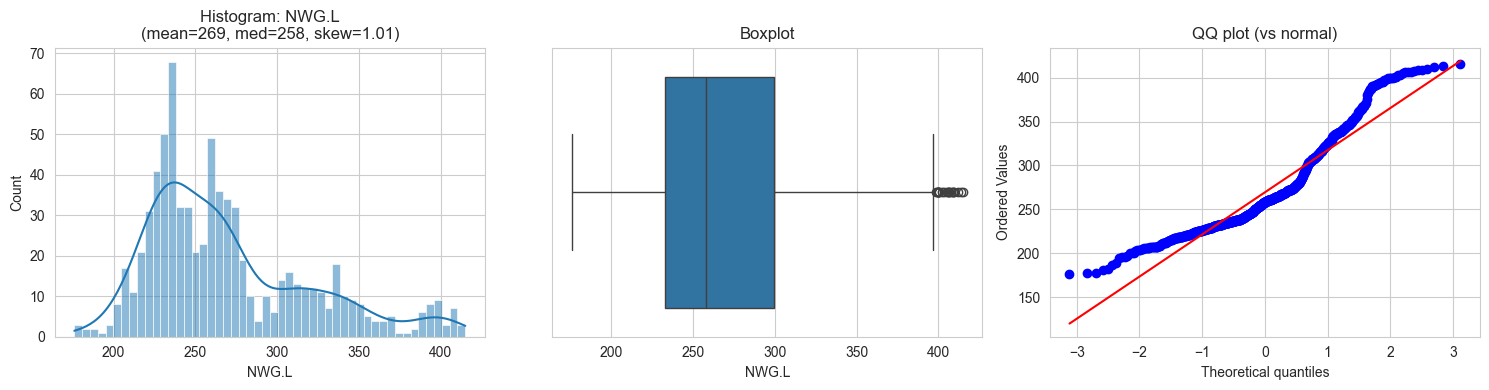

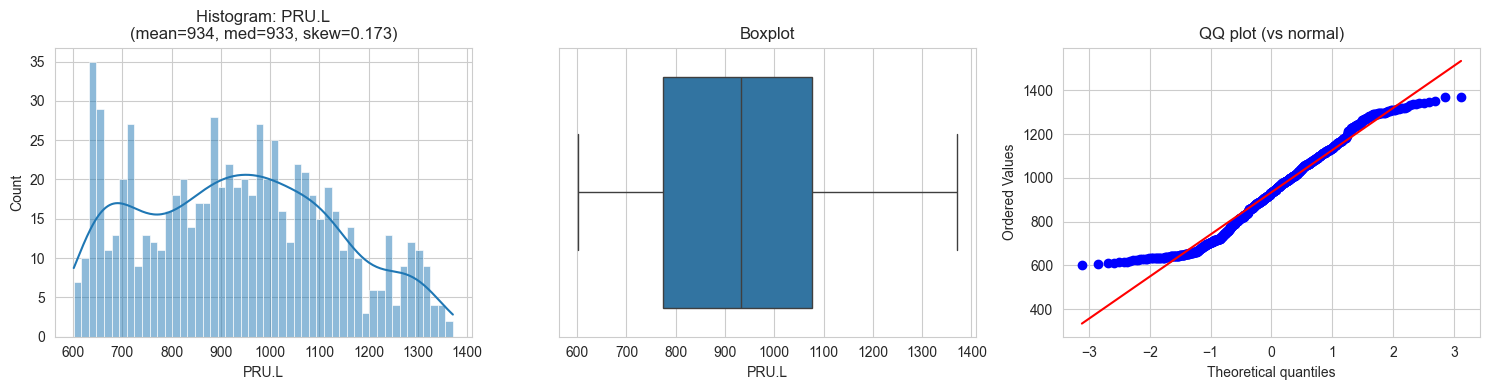

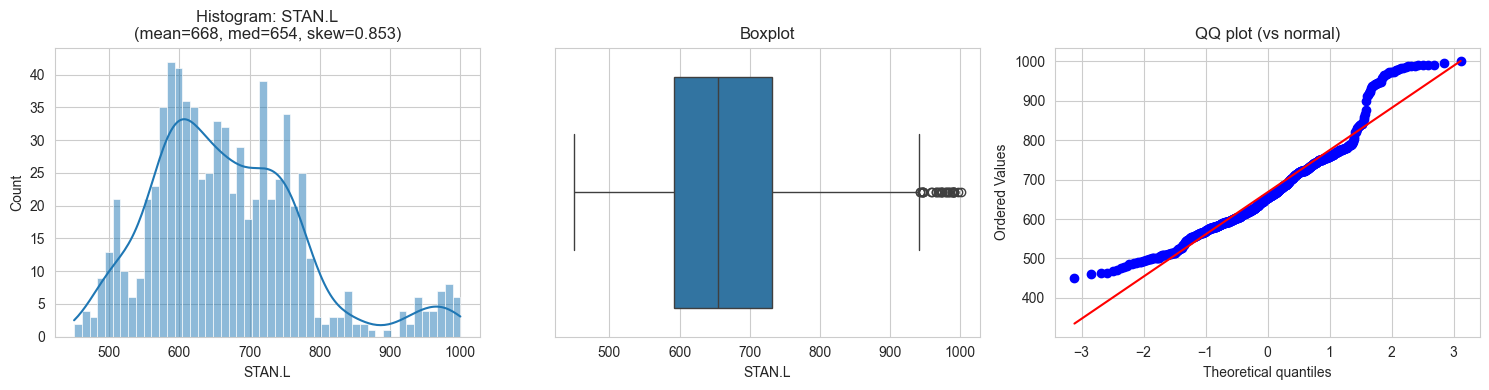

In [4]:
eda.plot_numeric_univariate(data["Adj Close"], cols=data["Adj Close"].columns.tolist(), bins=50)

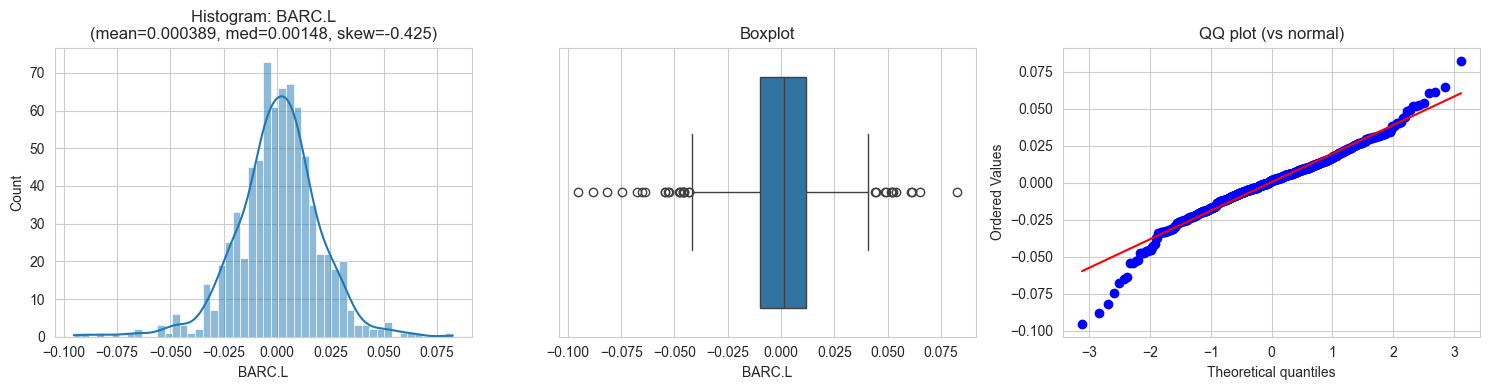

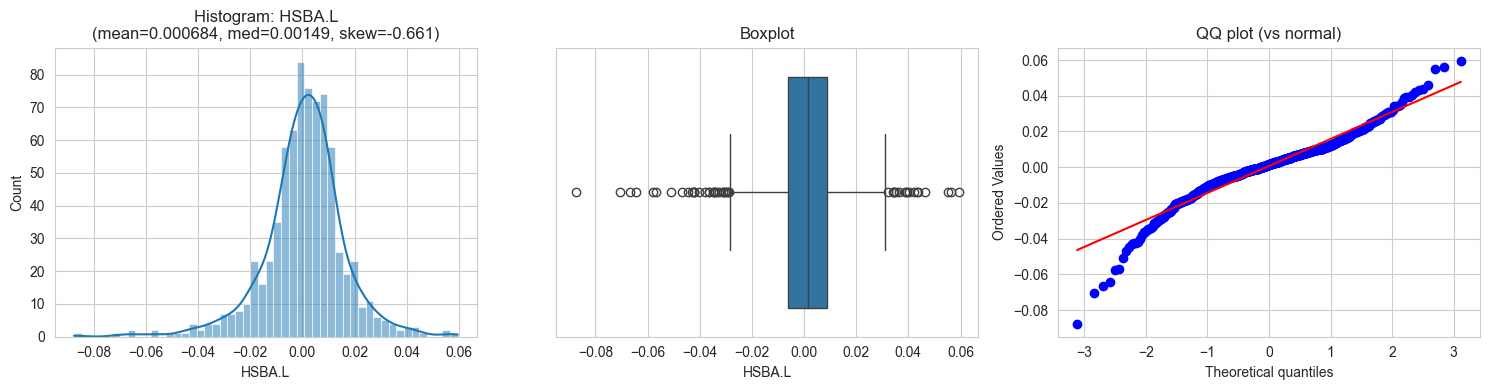

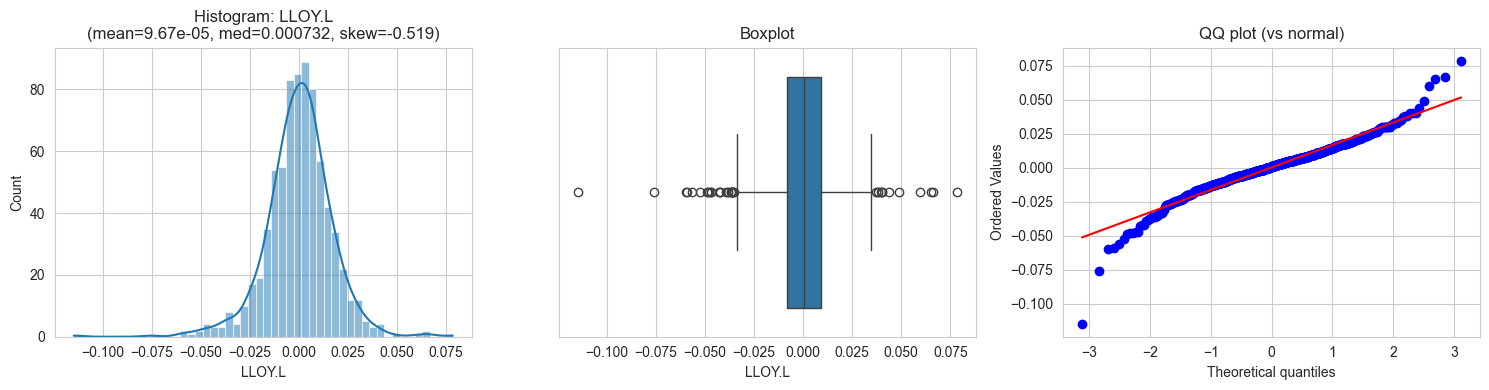

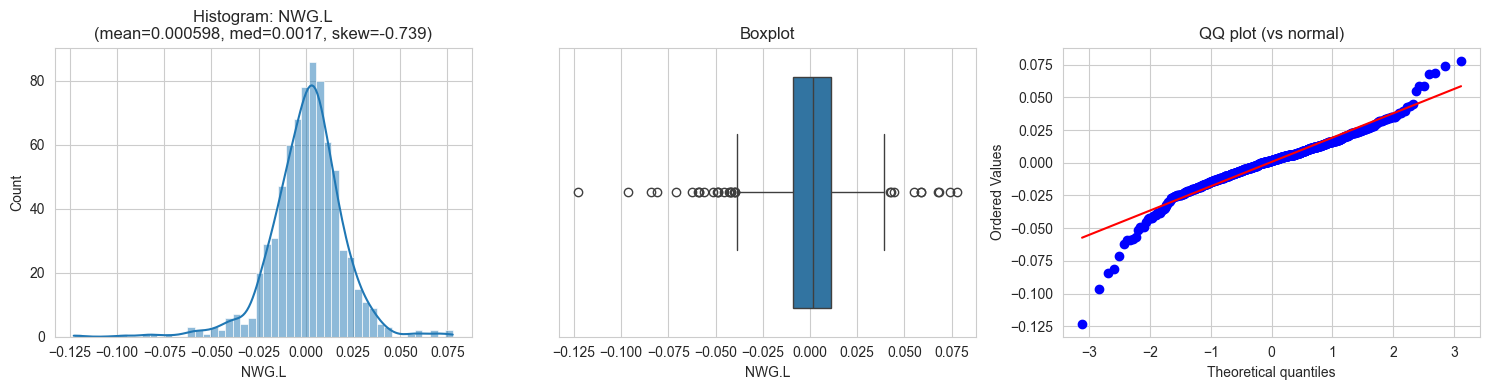

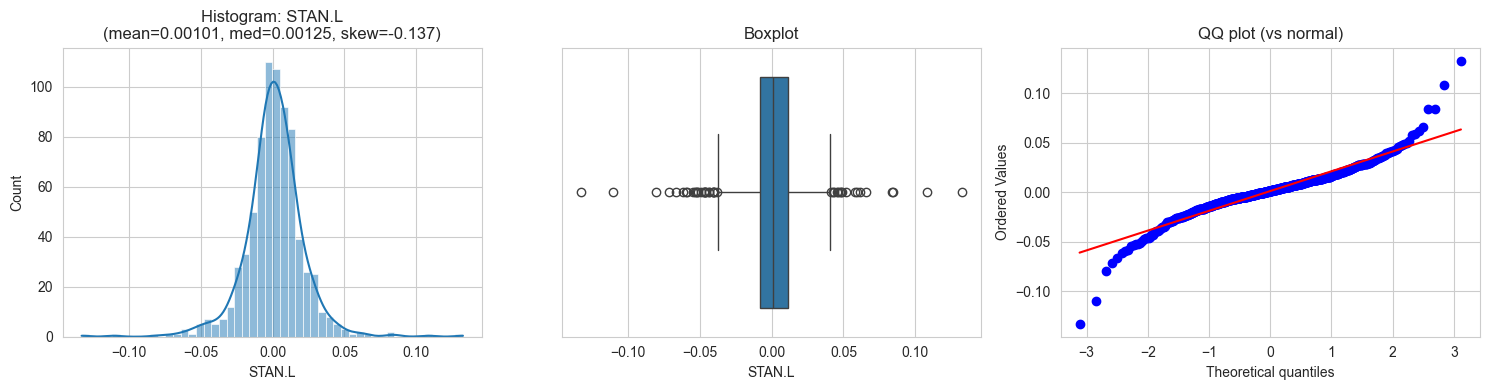

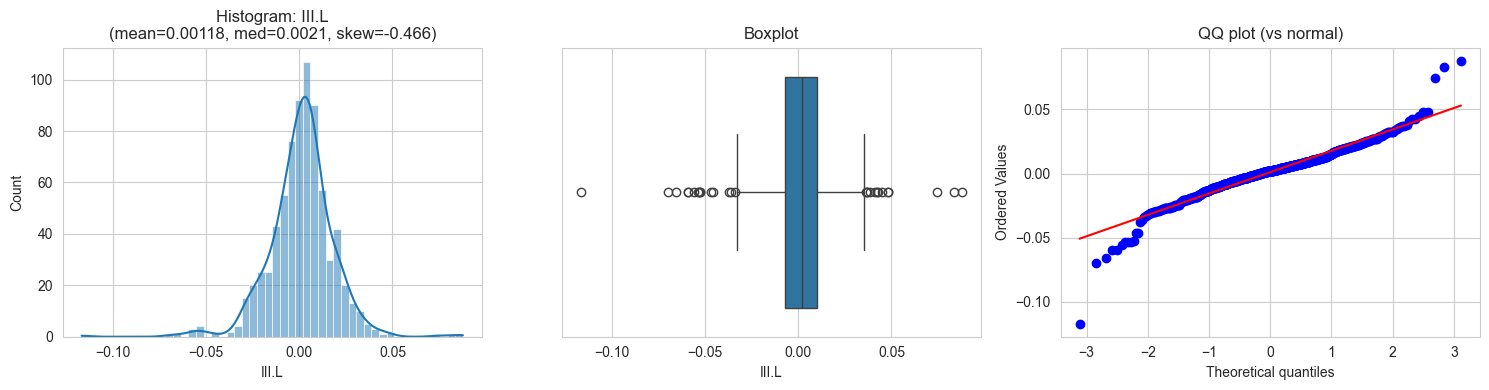

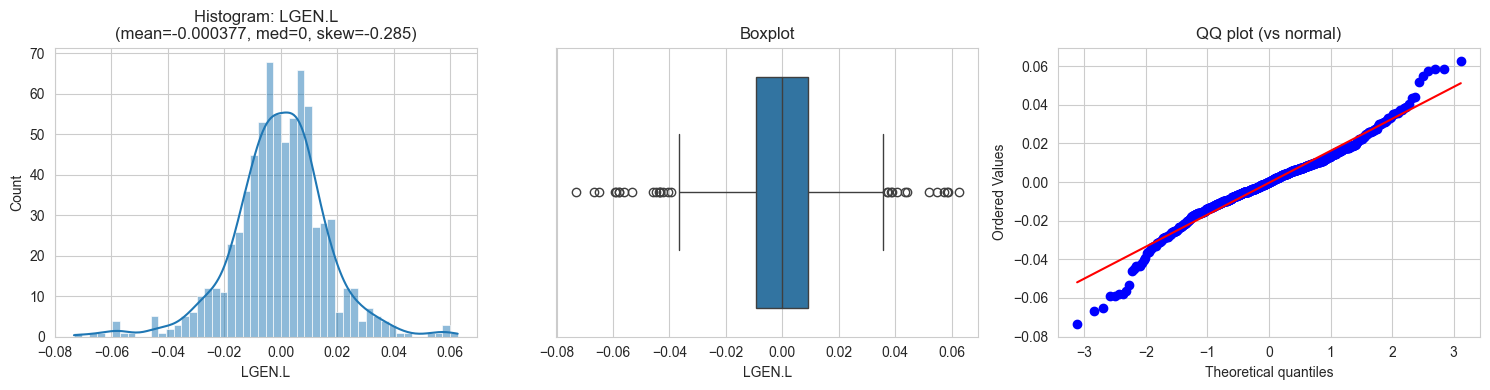

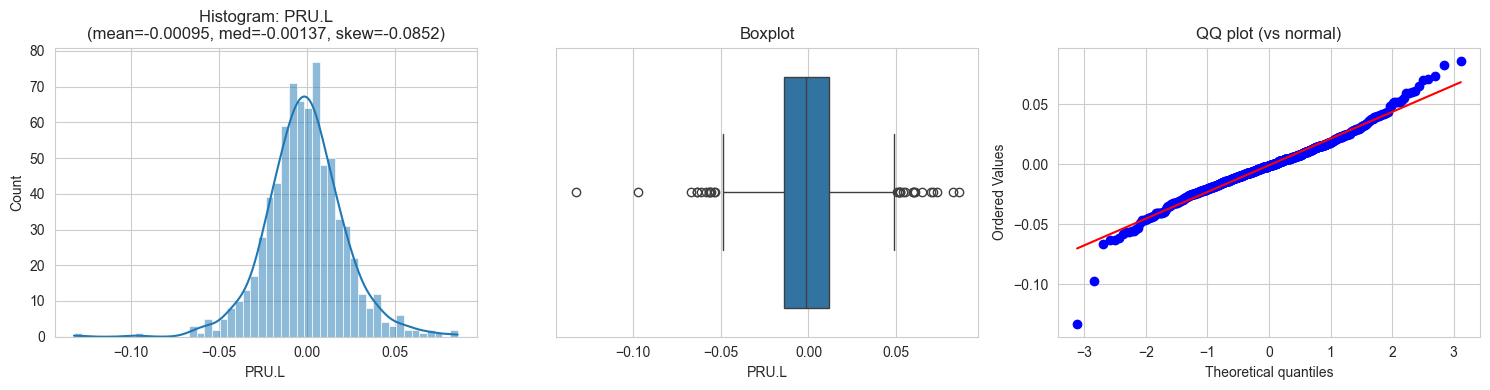

In [9]:
# Since the data seem quite skewed, we will apply a log return transformation
for ticker in tickers:
    data[("Log_Returns", ticker)] = np.log(data["Adj Close"][ticker]).diff()

data.dropna(inplace=True)

eda.plot_numeric_univariate(data["Log_Returns"], cols=data["Log_Returns"].columns.tolist(), bins=50)

# Volume EDA 

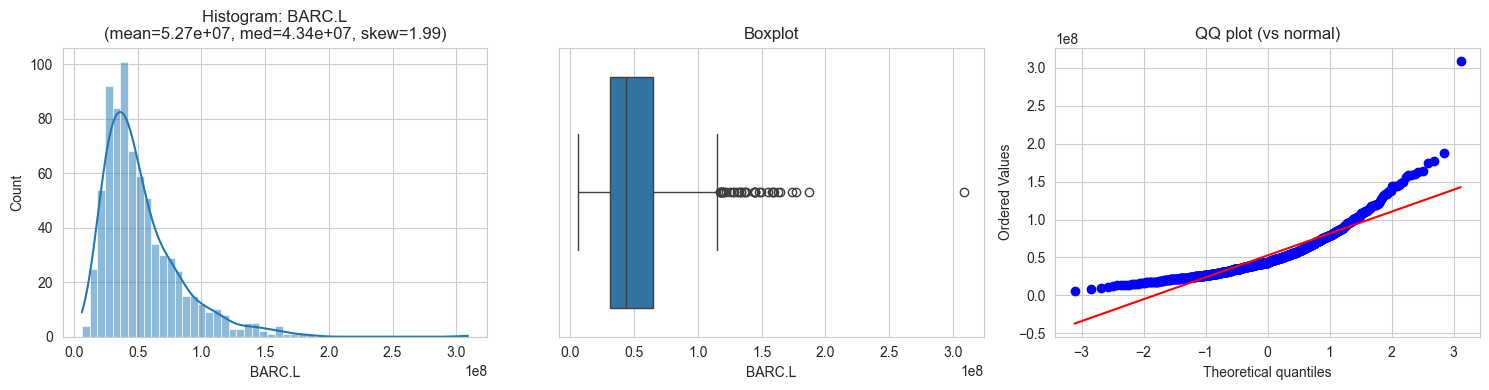

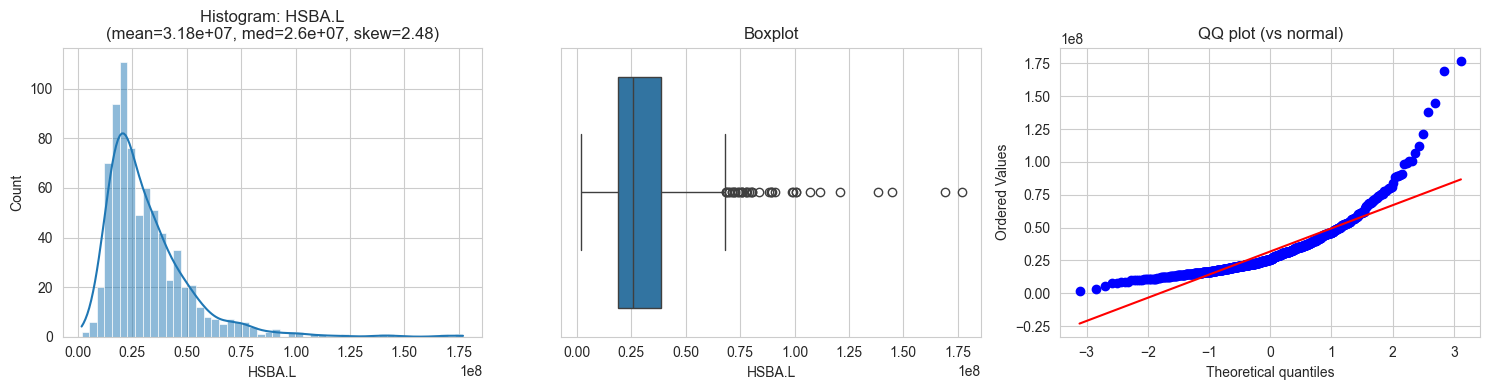

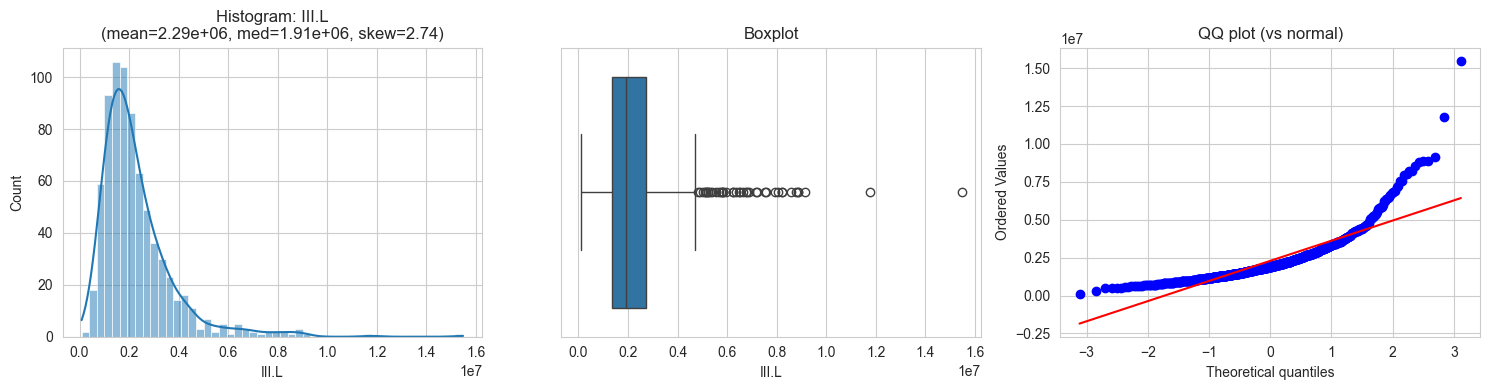

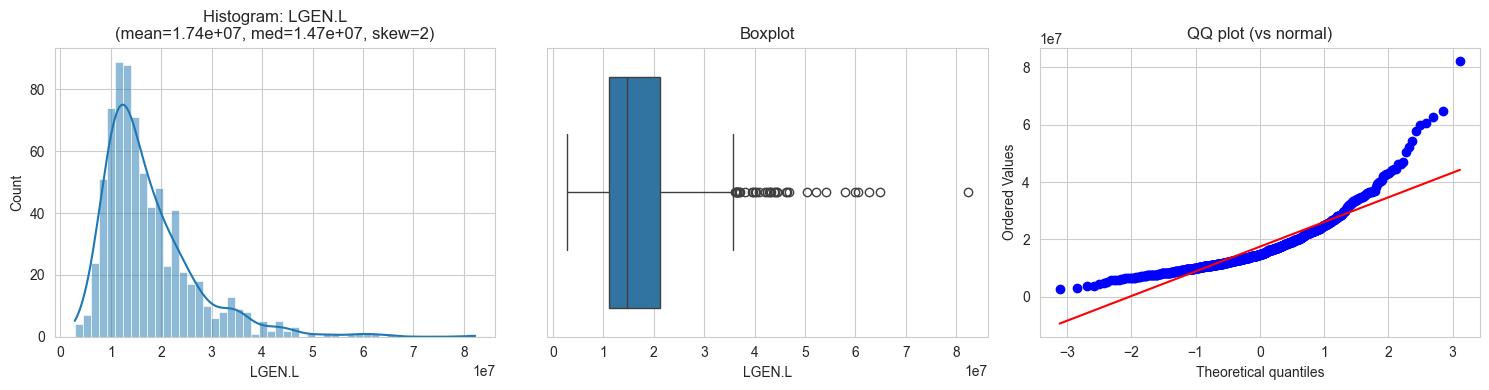

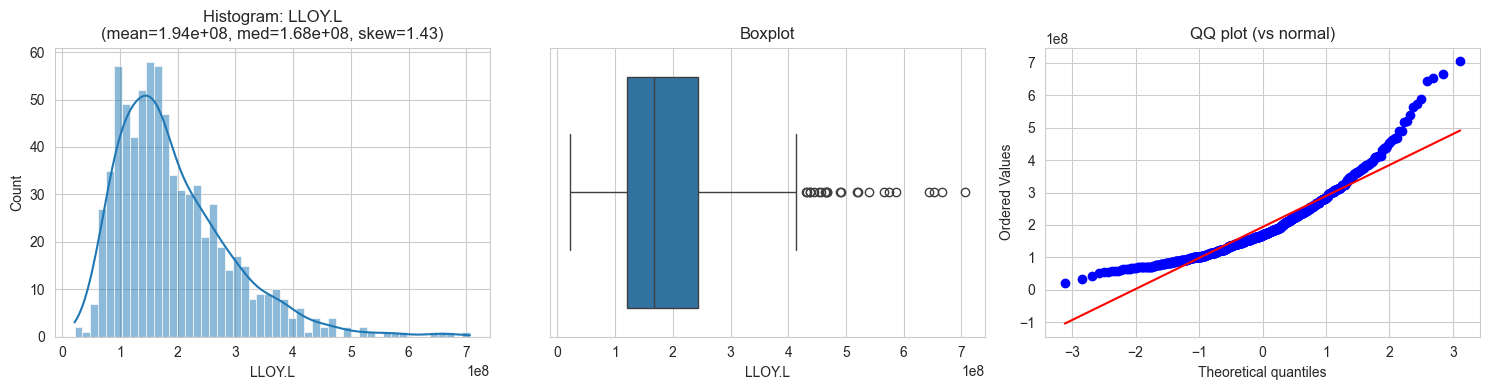

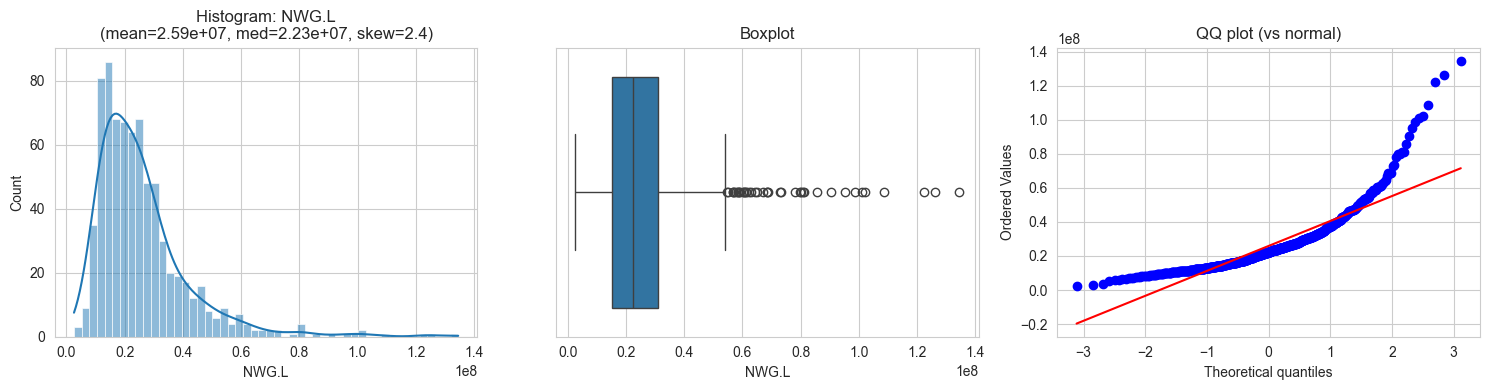

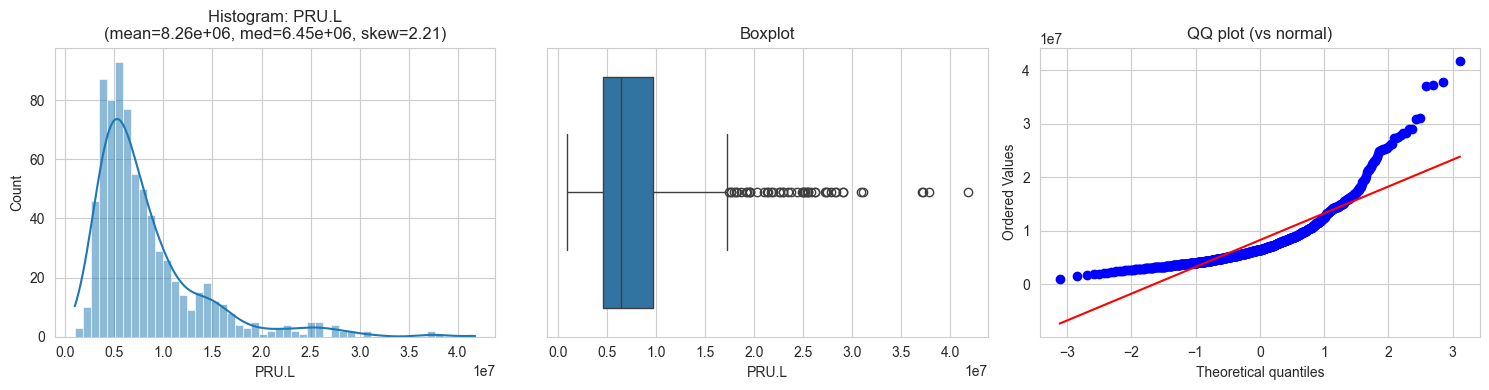

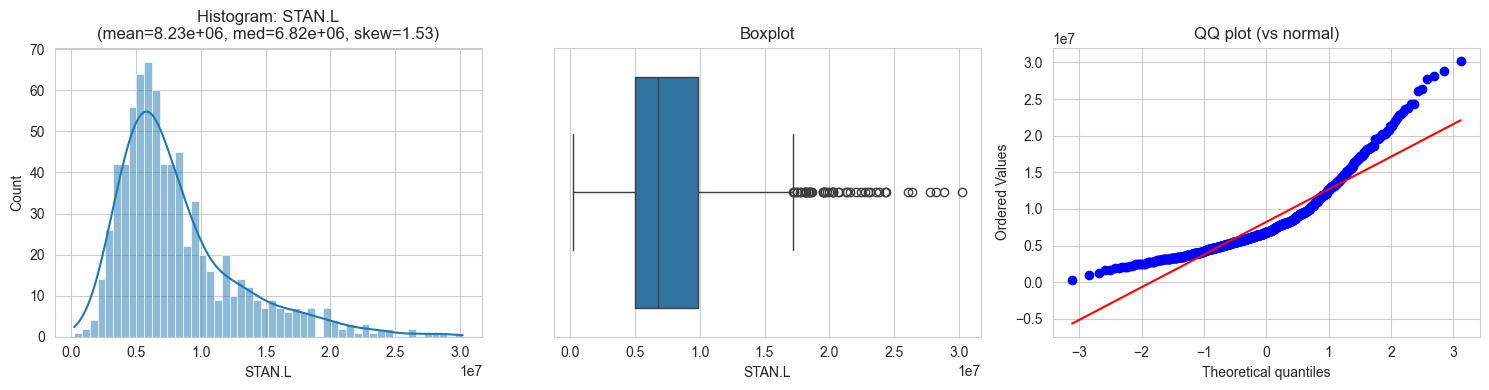

In [10]:
volume_data = data["Volume"]
eda.plot_numeric_univariate(volume_data, cols=volume_data.columns.tolist(), bins=50)

# Correlation Plots 

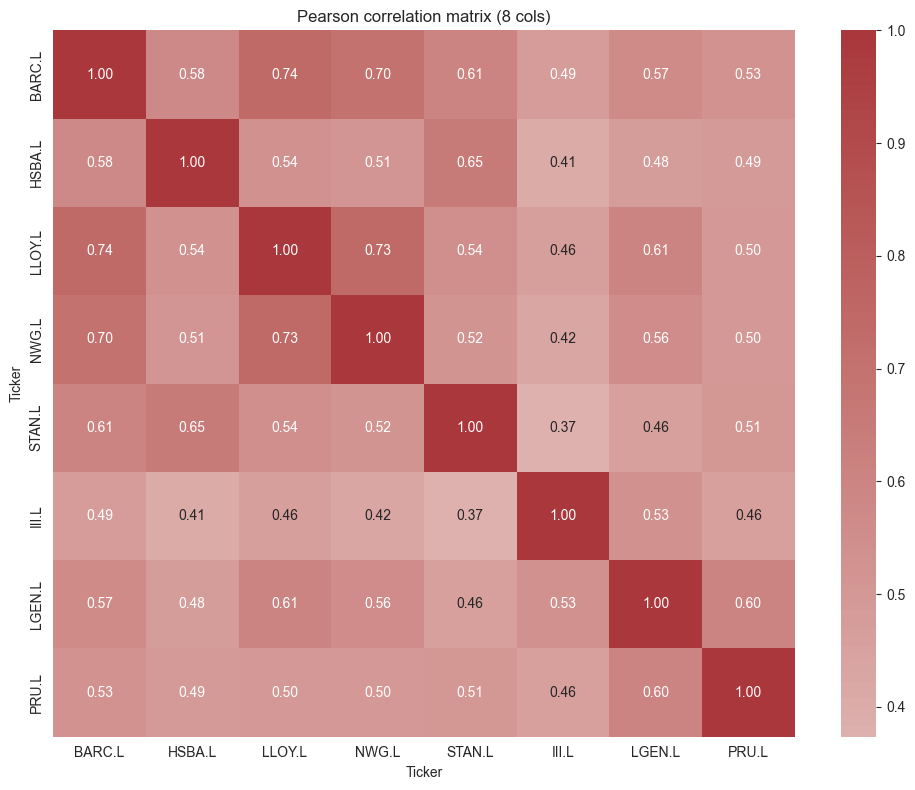

The minimum correlation is: 0.37346879419111034
The maximum correlation is: 0.7385001284824176


In [30]:
matrix = eda.correlation_matrix(data["Log_Returns"], cols=data["Log_Returns"].columns.tolist())
print("The minimum correlation is:", matrix.min().min())
print("The maximum correlation is:", matrix[matrix < 1].max().max())